# Python for Data Analysis

### Research Computing Services

Instructor: Scott Ladenheim <br>
Website: [rcs.bu.edu](http://www.bu.edu/tech/support/research/) <br>
Tutorial materials: [http://rcs.bu.edu/examples/python/DataAnalysis](http://rcs.bu.edu/examples/python/DataAnalysis) <br>
Contact us: help@scc.bu.edu

## Course Content
1. Python packages for data scientists
2. Data manipulation with Pandas
3. Basic data plotting
4. Descriptive statistics
5. Inferential statistics


## Tutorial Evaluation
After the tutorial please submit an evaluation by clicking on this link [Tutorial Evaluation](http://scv.bu.edu/survey/tutorial_evaluation.html)

## Python packages for data scientists
* [NumPy](https://numpy.org)
    - Introduces objects for handling n-dimensional arrays such as vectors (1-D) and matrices (2-D)
    - Introduces functions to perform advanced mathematical and statistical operations on these objects
    - Provides vectorization of mathematical operations on arrays and matrices which significantly improves the performance 
    - Many other Python libraries are built on NumPy
* [SciPy](https://scipy.org)
    - Collection of algorithms for statistics, linear algebra, optimization, differential equations, numerical integration, and more
    - Part of SciPy stack
    - Built on NumPy
* [Pandas](https://pandas.pydata.org)
    - Adds data structures and tools designed to work with table-like data (similar to Vectors and Data Frames in R)
    - Provides tools for data maniuplation: *reshaping*, *merging*, *sorting*, *slicing*, *aggregation*, etc.
    - Easily allows to handle missing data
* [SciKit-Learn](https://scikit-learn.org/stable/)
    - Provides machine learning algorithms: classification, regression, clustering, model validation, etc.
    - Built on NumPy, Scipy, and matplotlib

* Many others
    - [Keras](https://keras.io/)
    - [Pytorch](https://pytorch.org/)
    - [Tensorflow](https://www.tensorflow.org/)
    
### Visualization
More in-depth look at visualization in the `Data Visualization in Python` course.
* [matplotlib](https://matplotlib.org/)
    - Python 2-D plotting library for pulibcation quality figures in a variety of hardcopy formats
    - Functionalities similar to MATLAB
    - Line plots, scatter plots, bar charts, histograms, pie charts, etc.
    - Effort needed to create advanced visualizations
* [seaborn](https://seaborn.pydata.org/)
    - Based on matplotlib
    - Provides a high-level interface for drawing attractive statistical graphs
    - Similar to the ggplot2 library in R
* [plotly](https://plotly.com/python/)
    -  over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
    - Built on top of the Plotly JavaScript library
    - Can create beautiful interactive web-based visualizations 

In [65]:
!pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     --                                    20.5/294.9 kB 640.0 kB/s eta 0:00:01
     -------                               61.4/294.9 kB 656.4 kB/s eta 0:00:01
     ----------------------                 174.1/294.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\NESTOR\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Loading Python libraries

In [66]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

## Pandas
The main focus of this tutorial is using the Pandas library to manipulate and analyze data.

Pandas is a python package that deals mostly with :
- **Series**  (1-D homogeneous array)
- **DataFrame** (2-D labeled heterogeneous array) 
- **MultiIndex** (for hierarchical data)
- **Xarray** (built on top of Pandas for n-D arrays)

The Pandas content of this tutorial will cover:
* Creating and understanding Series and DataFrames
* Importing/Reading data
* Data selection and filtering
* Data maniuplation via sorting, grouping, and rearranging
* Handling missing data


In addition we will also provide information on the following.
* Basic data plotting
* Descriptive statistics (time permitting)
* Inferential statistics (time permitting)

### Pandas Series

A Pandas *Series* is a 1-dimensional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). It is a generalized numpy array with an explicit axis called the *index*.

In [2]:
# Example of creating Pandas series :
# Order all S1 together
s1 = pd.Series([-3, -1, 1, 3, 5])
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [3]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
s1[:2] # First 2 elements

In [4]:
print(s1[[2,1,0]])  # Elements out of order

2    1
1   -1
0   -3
dtype: int64


In [7]:
type(s1)

pandas.core.series.Series

In [8]:
# Can place filtering conditions on series
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [9]:
# Creating Pandas series with index:
rng = np.random.default_rng()
s2 = pd.Series(rng.normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
print(s2)

a    0.376833
b   -0.470832
c    2.740235
d   -0.087619
e   -0.116430
dtype: float64


In [10]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [11]:
# Create a Series from dictionary
data = {'pi': 3.14159, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series(data)
print(s3)

{'pi': 3.14159, 'e': 2.71828}
pi    3.14159
e     2.71828
dtype: float64


In [13]:
# Create a new series from a dictionary and reorder the elements
s4 = pd.Series(data, index=['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14159
tau        NaN
dtype: float64


NaN (Not a Number) - is used to specify a missing value in Pandas.

In [14]:
# Series can be treated as a 1-D array and you can apply functions to them:
print("Median:", s4.median())

Median: 2.929935


In [15]:
# Methods can be used to filter series:
s4[s4 > s4.median()]

pi    3.14159
dtype: float64

### Attributes and Methods:
An attribute is a variable stored in the object, e.g., index or size with Series.
A method is a function stored in the object, e.g., head() or median() with Series.

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute *dir(s1)* to see all attributes and methods. 

I recommend using online documentation as well. This will be in a much easier format to read and come with examples.



In [16]:
# For more information on a particular method or attribute use the help() function
help(s4.head())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool | lib.NoDefault' = <no_default>) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scala

In [17]:
help(s4.index)

Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy: 'bool' = False, name=None, tupleize_cols: 'bool' = True) -> 'Self'
 |  
 |  Immutable sequence used for indexing and alignment.
 |  
 |  The basic object storing axis labels for all pandas objects.
 |  
 |  .. versionchanged:: 2.0.0
 |  
 |     Index can hold all numpy numeric dtypes (except float16). Previously only
 |     int64/uint64/float64 dtypes were accepted.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : str, numpy.dtype, or ExtensionDtype, optional
 |      Data type for the output Index. If not specified, this will be
 |      inferred from `data`.
 |      See the :ref:`user guide <basics.dtypes>` for more usages.
 |  copy : bool, default False
 |      Copy input data.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |   

In [18]:
# You can also add a question mark to get help information
s4.head?

Signature: s4.head(n: 'int' = 5) -> 'Self'
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `|n|` rows, equivalent to ``df[:n]``.

If n is larger than the number of rows, this function returns all rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()
      animal
0  

In [19]:
s4.index?

Type:        Index
String form: Index(['e', 'pi', 'tau'], dtype='object')
Length:      3
File:        c:\users\nestor\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\pandas\core\indexes\base.py
Docstring:  
Immutable sequence used for indexing and alignment.

The basic object storing axis labels for all pandas objects.

.. versionchanged:: 2.0.0

   Index can hold all numpy numeric dtypes (except float16). Previously only
   int64/uint64/float64 dtypes were accepted.

Parameters
----------
data : array-like (1-dimensional)
dtype : str, numpy.dtype, or ExtensionDtype, optional
    Data type for the output Index. If not specified, this will be
    inferred from `data`.
    See the :ref:`user guide <basics.dtypes>` for more usages.
copy : bool, default False
    Copy input data.
name : object
    Name to be stored in the index.
tupleize_cols : bool (default: True)
    When True, attempt to create a MultiIndex if p

One final way to get help is to press shift-tab when you are in the parentheses of a method or after an attribute. Try this in the exercise below.

### Exercise - Create your own Series

In [ ]:
# Create a series with 10 elements containing both positive and negative integers
# Examine the series with the head() method
# Create a new series from the originally created series with only negative numbers
# <your code goes here >
# mys = pd.Series(  ...  )

### Pandas DataFrames

A Pandas *DataFrame* is a 2-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns. You can think of it as a dictionary-like container to store Python Series objects.

In [20]:
d = pd.DataFrame({'Name': pd.Series(['Alice', 'Bob', 'Chris']), 
                  'Age': pd.Series([21, 25, 23])})
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [22]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'], [21, 25, 23]]).T, columns=['Name','Age'])

In [23]:
# Use the head() method to print the first 5 records in the dataframe (same as with series)
d2.head()

,Name,Age
0,Alice,21
1,Bob,25
2,Chris,23


In [24]:
# Add a new column to d2:
d2['Height'] = pd.Series([5.2, 6.0, 5.6])
d2.head()

,Name,Age,Height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


### Reading data using Pandas
You can read CSV (comma separated values) files using Pandas. The command shown below reads a CSV file into the Pandas dataframe df.

In [25]:
# Read a csv file into Pandas Dataframe
df = pd.read_csv("http://rcs.bu.edu/examples/python/DataAnalysis/Salaries.csv")

The above command has many optional arguments that you can find in the Pandas documentation online.

You can also read many other formats, for instance:
* Excel - pd.read_excel('myfile.xlsx', sheet_name='Sheet1', index_col=None, na_values=['NA'])
* Stata - pd.read_stata('myfile.dta')
* SAS - pd.read_sas('myfile.sas7bdat')
* HDF - pd.read_hdf('myfile.h5', 'df')

Before we can perform any analysis on the data we need to


*   Check if the data is correctly imported 
*   Check the types of each column
*   Determine how many missing values each column has

We can then carefully prepare the data:

*   Remove columns that are not needed in our analysis
*   Rename the columns (if necessary)
*   Possibly rearrange the columns to make it easier to work with them
*   Create new or modify existing columns (e.g., convert into different units) if necessary

In [26]:
# Display the first 10 records
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [27]:
# Display structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


### More details on DataFrame data types

|Pandas Type | Native Python Type | Description |
|------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).|
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta\[ns\]| N/A (but see the datetime module in Python’s standard library) | Values meant to hold time data. Look into these for time series experiments. |


### DataFrame attributes
|df.attribute | Description |
|-------------|-------------|
| dtypes | list the types of the columns |
| columns | list the column names |
| axes | list the row labels and column names |
| ndim | number of dimensions |
| size | number of elements |
| shape | return a tuple representung the dimensionality |
| values | numpy representation of the data |

### Dataframe methods
|df.method() | Description |
|-------------|-------------|
| head(\[n\]), tail(\[n\]) | first/last n rows |
| describe() | generate descriptive statistics (for numeric columns only) |
| max(), min() | return max/min values for all numeric columns |
| mean(), median() | return mean/median values for all numeric columns |
| std() | standard deviation |
| sample(\[n\]) | returns a random sample of n elements from the data frame |
| dropna() | drop all the records with missing values |

Sometimes the column names in the input file are too long or contain special characters. In such cases we rename them to make it easier to work with these columns.

In [28]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={'sex': 'gender', 'phd': 'yearsAfterPhD', 'service': 'yearsOfService'})
df_new.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


### DataFrame Exploration

In [29]:
# Identify the type of df_new object
type(df_new)

pandas.core.frame.DataFrame

In [30]:
# Check the data type of the column "salary"
# We access columns using the brackets, e.g., df['column_name']
df_new['salary'].dtype

dtype('int64')

In [31]:
# If the column name has no spaces, complex symbols, and is not the name of an attribute/method
# you can use the syntax df.column_name
df_new.salary.dtype

dtype('int64')

In [32]:
# List the types of all columns
df_new.dtypes

rank              object
discipline        object
yearsAfterPhD      int64
yearsOfService     int64
gender            object
salary             int64
dtype: object

In [33]:
# List the column names
df_new.columns

Index(['rank', 'discipline', 'yearsAfterPhD', 'yearsOfService', 'gender',
       'salary'],
      dtype='object')

In [34]:
# List the row labels and the column names
df_new.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'yearsAfterPhD', 'yearsOfService', 'gender',
        'salary'],
       dtype='object')]

In [35]:
# Number of rows and columns
df_new.shape

(78, 6)

In [36]:
# Total number of elements in the Data Frame (78 x 6)
df_new.size

468

In [37]:
# Output some descriptive statistics for the numeric columns
df_new.describe()

,yearsAfterPhD,yearsOfService,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [38]:
# Remeber we can use the ? to get help about the function
df_new.describe?

Signature: df_new.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits t

In [39]:
# Create a new column using the assign method
df_new = df_new.assign(salary_k=lambda x: x.salary/1000.0)
df_new.head(10)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
5,Prof,A,20,20,Male,122400,122.400
6,AssocProf,A,20,17,Male,81285,81.285
7,Prof,A,18,18,Male,126300,126.300
8,Prof,A,29,19,Male,94350,94.350
9,Prof,A,51,51,Male,57800,57.800


In [40]:
# Check how many unique values are in a column
# There is a rank attribute in DataFrame object so we access using df['rank']
df_new['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [41]:
# Get the frequency table for a categorical or binary column
df_new['rank'].value_counts()

rank
Prof         46
AsstProf     19
AssocProf    13
Name: count, dtype: int64

In [42]:
# Get a proportion table
df_new['rank'].value_counts()/sum(df['rank'].value_counts())

rank
Prof         0.589744
AsstProf     0.243590
AssocProf    0.166667
Name: count, dtype: float64

In [43]:
# Alternatively we can use the pandas function crosstab() to calculate a frequency table
pd.crosstab(index=df_new['rank'], columns="count")

col_0,count
rank,
AssocProf,13
AsstProf,19
Prof,46


In [44]:
# Two-way tables
pd.crosstab(index=df_new['rank'], columns=df_new['discipline'], margins=True)

discipline,A,B,All
rank,,,
AssocProf,5,8,13
AsstProf,8,11,19
Prof,23,23,46
All,36,42,78


### Data slicing and grouping

In [45]:
#Extract a column by name 
df_new['gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: object

In [47]:
# If the column name does not contain spaces or other special characters and does not collide with data frame methods, we can use a dot notation
df_new.gender.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: gender, dtype: object

In [48]:
# Calculate median number of service years
df_new.yearsOfService.median()

14.5

### Exercise - Working with a single column

In [ ]:
# Calculate the descriptive statistics for only the salary column in df_new
# <your code goes here>

In [ ]:
# Get a count for each of the values in the salary_k column in df_new
# <your code goes here>

In [ ]:
# Calculate the average (mean) salary_k in df_new
# <your code goes here>

### Grouping data

In [54]:
# Group data using rank
df_rank = df_new.groupby('rank')
df_rank.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
6,AssocProf,A,20,17,Male,81285,81.285
12,AsstProf,B,1,0,Male,88000,88.000
16,AsstProf,B,8,3,Male,75044,75.044
17,AsstProf,B,4,0,Male,92000,92.000
20,AsstProf,B,4,4,Male,92000,92.000


In [55]:
# Calculate mean of all numeric columns for the grouped object
df_rank.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [52]:
# Most of the time, the "grouping" object is not stored, but is used as a step in getting a summary:
df_new.groupby('gender').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [56]:
# Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df_new.groupby('gender')['salary'].mean()

gender
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [57]:
# If we use double brackets Pandas will produce a DataFrame
df_new.groupby('gender')[['salary']].mean()

,salary
gender,
Female,101002.410256
Male,115045.153846


In [58]:
# Group using 2 variables - gender and rank:
df_new.groupby(['rank','gender'], sort=True)[['salary']].mean()

salary
rank      gender               
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

### Exercise - Grouping data

In [ ]:
# Group data by the rank and discipline and find the average yearsOfService and salary_k for each group. 
# <your code goes here>

### Filtering

In [ ]:
# Select observation with the value in the salary column > 120K
df_filter = df_new[df_new.salary > 120000]
df_filter.head()

In [ ]:
df_filter.axes

In [ ]:
# Select data for female professors
df_w = df_new[df_new.gender == 'Female']
df_w.head()

In [ ]:
# To subset one column using a condition in another columns use method "where"
df_new.salary.where(df_new.gender=='Female').dropna().head(6)

### Exercise - Filtering data 

In [ ]:
# Using filtering, find the mean value of the salary for the discipline A
# <your code goes here>

In [ ]:
# Challenge:
# Determine how many female and male professors earned more than 100K
# <your code goes here>

### Slicing a dataframe

In [ ]:
# Select column salary
salary = df_new['salary']

In [ ]:
# Check data type of the result
type(salary)

In [ ]:
# Look at the first few elements of the output
salary.head()

In [ ]:
# Select column salary and make the output to be a data frame
df_salary = df_new[['salary']]

In [ ]:
# Check the type
type(df_salary)

In [ ]:
# Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df_new[0:10]

In [ ]:
# If we want to select both rows and columns we can use method .loc
df_new.loc[10:20, ['rank', 'gender','salary']]

In [ ]:
# Recall our filtered dataset with salaries over 120K
df_filter.head(25)

In [ ]:
# Let's see what we get for our df_filter data frame
# Method .loc subsets the data frame based on the index values:
# loc = location
df_filter.loc[10:20,['rank','gender','salary']]

In [ ]:
# Unlike method .loc, method iloc selects rows (and columns) by absolute position:
# iloc = integer location
df_filter.iloc[10:20, [0,3,4,5]]

### Exercise - Slicing a dataframe

In [ ]:
# Create a new dataframe where you filter out salaries below 100K from df_new
# Call this data frame df_sub100

In [ ]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] of df_sub100 using the .loc method
# How many rows are in the output?

In [ ]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] from df_sub100 using the iloc method
# What are the values of the indices in the output?

In [ ]:
# Extract rows with index values [6, 12, 20, 22] and columns ['yearsOfService','salary_k'] from df_sub100
# Hint: Use the loc method

### Sorting the Data

In [ ]:
# Sort the data frame df_new by service and create a new data frame
df_sorted = df_new.sort_values(by = 'yearsOfService')
df_sorted.head()

In [ ]:
# Sort the data frame df_new by yearsOfService and overwrite the original dataset
df_new.sort_values(by = 'yearsOfService', ascending = False, inplace = True)
df_new.head()

In [ ]:
# Restore the original order using the sort_index method
df_new.sort_index(axis=0, ascending = True, inplace = True)
df_new.head()

In [ ]:
# Sort the data frame using 2 or more columns:
df_sorted2 = df_new.sort_values(by = ['yearsOfService', 'salary'], ascending = [True,False])
df_sorted2.head(15)

### Exercise - Sorting 

In [ ]:
# Sort the data frame df_new by the salary (in descending order)
# Store the output of this sorting in a dataframe called df_desc
# Display the first 10 records of the output
# <your code goes here>

### Missing Values
To discuss how to handle missing values we will import the flights data set.

In [ ]:
# Read a dataset with missing values
flights = pd.read_csv("http://rcs.bu.edu/examples/python/DataAnalysis/flights.csv")
flights.head()

In [ ]:
flights.info()

In [ ]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

In [ ]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[flights['arr_delay'].notnull( )]
flights1.head()

In [ ]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [ ]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

### Exercise Count missing data

In [ ]:
# Count how many missing pieces of data there are in the dep_delay and arr_delay columns


### Common Aggregation Functions:

The following functions are commonly used functions to aggregate data.

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [ ]:
# Find the number of non-missing values in each column
flights.describe()

In [ ]:
flights.info()

In [ ]:
# Find mean value for all the columns in the dataset
flights.min()

In [ ]:
# Let's compute summary statistic per a group':
flights.groupby('carrier')['dep_delay'].mean()

In [ ]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

In [ ]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']})

## Exploring data using graphics

In [59]:
# Show graphs within the Python notebook
%matplotlib inline

### Graphics with the Salaries dataset

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <BarContainer object of 8 artists>)

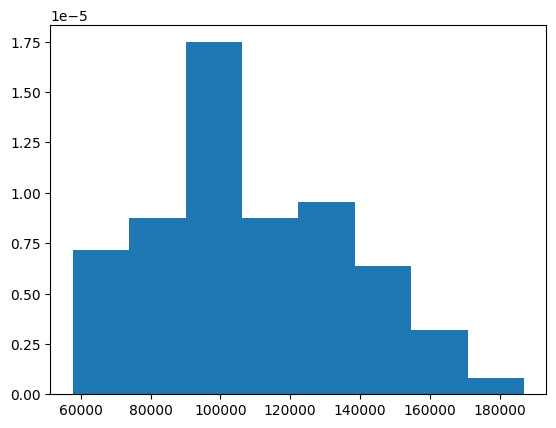

In [60]:
# Use matplotlib to draw a histogram of a salary data
plt.hist(df_new['salary'],bins=8, density=True)

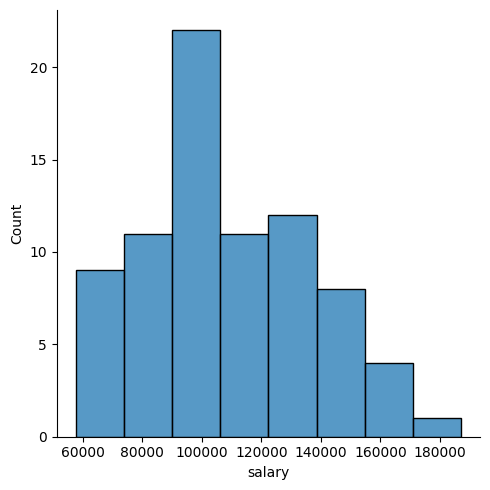

In [67]:
# Use seaborn package to draw a histogram
sns.displot(df_new['salary']);

<Axes: xlabel='rank'>

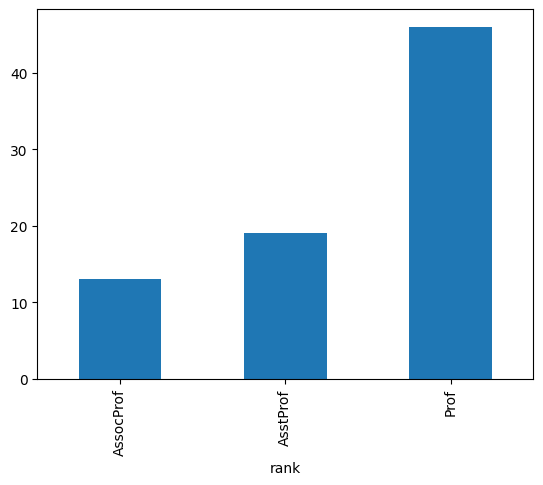

In [68]:
# Use regular matplotlib function to display a barplot
df_new.groupby(['rank'])['salary'].count().plot(kind='bar')

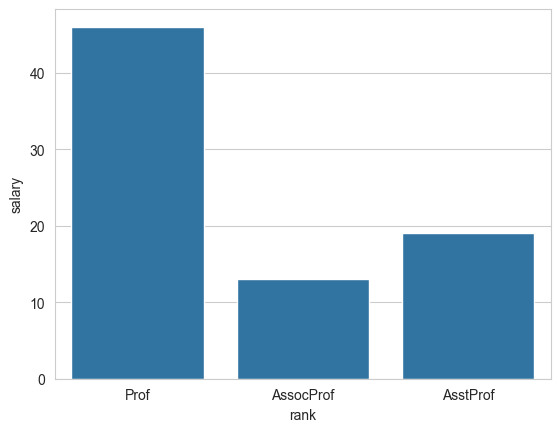

In [69]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
ax = sns.barplot(x='rank',y ='salary', data=df_new, estimator=len)

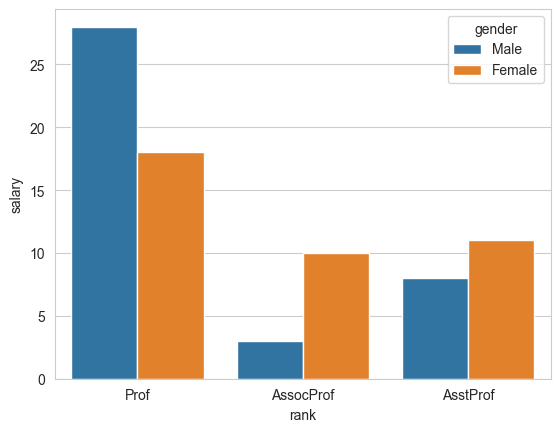

In [70]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='gender', data=df_new, estimator=len)

<Axes: xlabel='salary'>

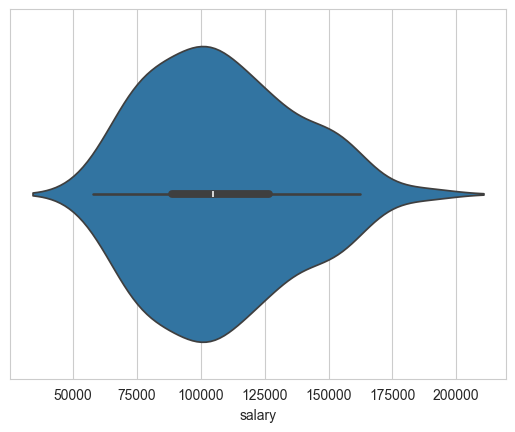

In [71]:
# Violinplot
sns.violinplot(x = "salary", data=df_new)

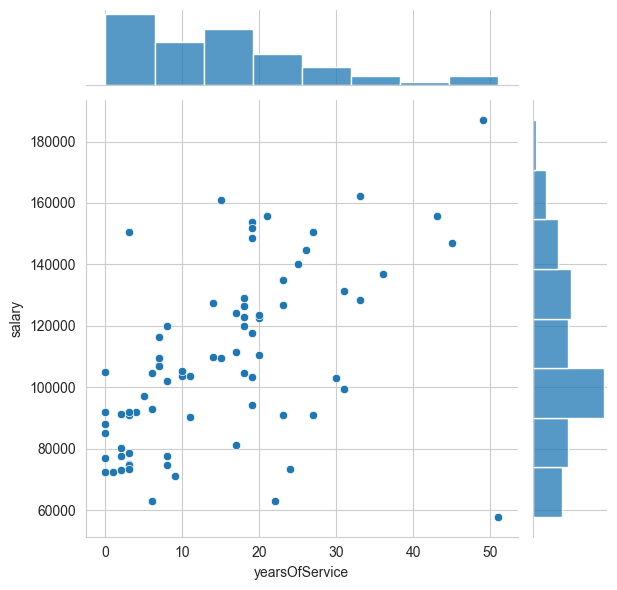

In [72]:
# Scatterplot in seaborn
sns.jointplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='yearsOfService', ylabel='salary'>

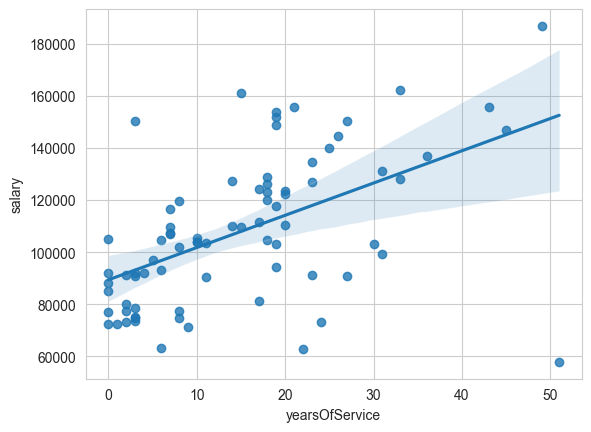

In [73]:
# If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

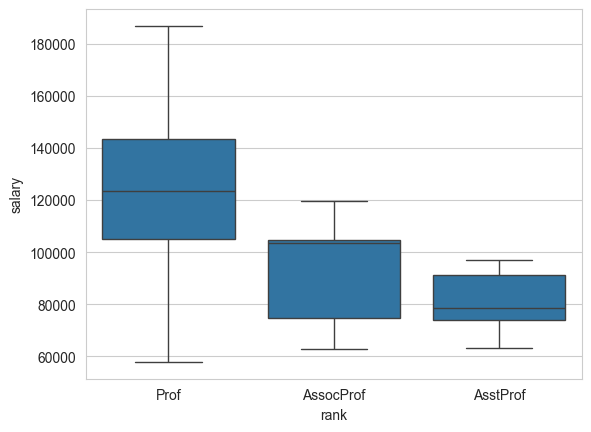

In [74]:
# Box plot
sns.boxplot(x='rank',y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

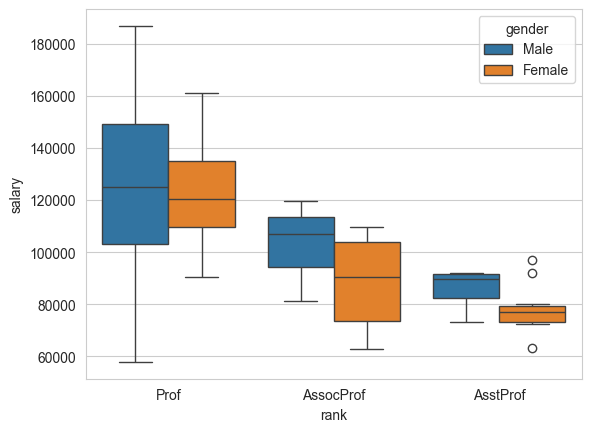

In [75]:
# Side-by-side box plot
sns.boxplot(x='rank', y='salary', data=df_new, hue='gender')

<Axes: xlabel='rank', ylabel='salary'>

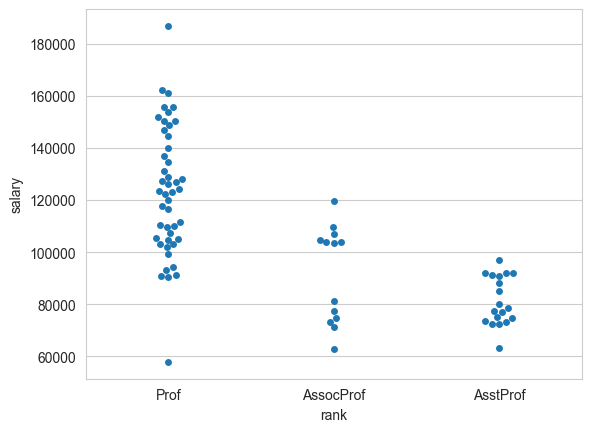

In [76]:
# Swarm plot
sns.swarmplot(x='rank', y='salary', data=df_new)

TypeError: agg function failed [how->mean,dtype->object]

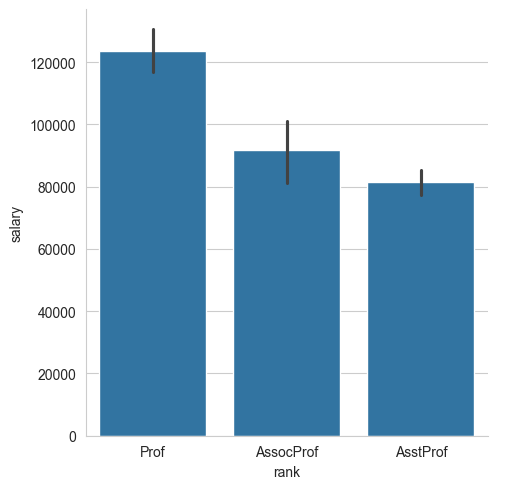

In [78]:
# Factorplot
sns.catplot(x='rank', y='salary', data=df_new, kind='bar')
print(df_new.groupby('rank').mean())

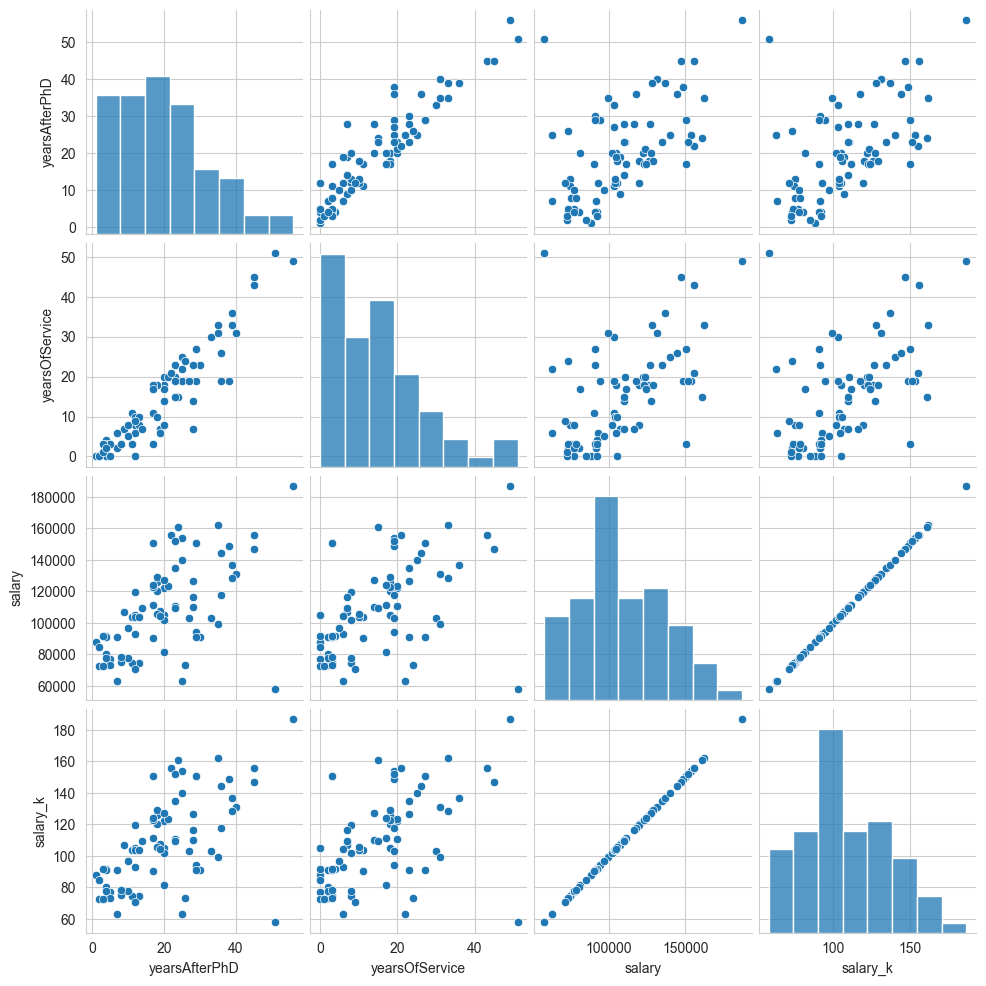

In [79]:
# Pairplot 
sns.pairplot(df_new)

### Exercise 7 Graphing data

In [ ]:
# Use the seaborn package to explore the dependency of arr_delay on dep_delay 
# in the flights dataset. You can use a scatterplot or regplot using flight.
# <your code goes here>

## Descriptive statistics
Statistics that are used to describe data. We have seen methods that calculate descriptive statistics before with the DataFrame describe() method. 

Descriptive statistics summarize attributes of a sample, such as the min/max values, and the mean (average) of the data. Below is a summary of some additional methods that calculate descriptive statistics.

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [ ]:
# Recall the describe() function which computes a subset of the above listed statistics
flights.dep_delay.describe()

In [ ]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

In [ ]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

## Inferential Statistics
Use data analysis on a sample of data to infer properties and make predictions that cannot be derived from descriptive statistics. Examples of this could be predicting a new unknown value based on previous data (linear regression, machine learning) or hypothesis testing (such as T-tests).

### Linear Regression
A linear approach to model the relationship between a scalar output and one (or more) input variables. With one input and one output variable you are finding a line of *best fit*. You calculate the slope and y-intercept for a line that minimizes the distance between all the existing data points. You can then use this line to make predictions on unknown data.

In [ ]:
# Import Statsmodel functions:
import statsmodels.api as sm

In [ ]:
# Create a fitted model
lm = sm.OLS(df_new.yearsOfService, df_new.salary).fit()

# Print model summary
print(lm.summary())

In [ ]:
# Print the coefficients
lm.params

In [ ]:
# Using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
# When you use dataframe columns this fits your model with feature names
est.fit(df_new[['yearsOfService']], df_new[['salary']])

# If you pass the values, you don't have to use feature names
# est.fit(df_new[['yearsOfService']].values, df_new[['salary']].values)

# Print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)

# Predict 
# When you predict you have to use the features name otherwise you get a warning
pred = est.predict(pd.DataFrame(np.array([21]), columns=['yearsOfService']))

# If you created a model based on values, then you predict with only a value, 
# though you have to pass it with the same shape coef_ 
# pred = est.predict([[21]])
print("Predicted salary: ", pred)


### Exercise 8 Build a linear model

In [ ]:
# Build a linear model for arr_delay ~ dep_delay

# Print model summary

# Predict a value


### Student T-test
Used to compare the means of two groups. In this case you have a null hypothesis that the two group means are equal. The T-test then tells you whether you have statistically significant evidence to reject the null hypothesis. 
The T-test has two output results, the statistic, and the p-value. The statistic (or T-value) quantifies the difference between the two mean values. The p-value is the probability of obtaining test results at least as extreme as the result that is observed assuming that the null hypothesis is correct.

More succintly, the p-value  tells you how likely it is that your data could have occured under the null hypothesis.  Small p-values indicate there is a small probability of observing such a difference in the mean assuming the null hypothesis is true. Small p-values indicate that there is evidence to reject the null hypothesis (i.e., the group means are different). 

Conversely, larger p-value scores indicate there is a large probabiliy of observing the calculated statistic under the null hypothesis. Large p-values indicate that you have evidence to accept the null hypothesis (i.e., the group means are equal).

One area the T-test is important is in clinical trials. Consider an example where you are looking at whether a drug reduces your cholesterol level. You have 2 populations, one where the drug is administered and another that is not administered. You can use the T-test to determine whether there is evidence to suggest that the drug causes a statistically significant change to the cholesterol level between the two populations.

Below we calculate whether there is a meaningful difference between male and female salaries. Generally a p-value below 0.05 is considered statistically significant.

In [ ]:
# Using scipy package:
from scipy import stats
df_w = df[df['sex'] == 'Female']['salary']
df_m = df[df['sex'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   

## Tutorial Evaluation
After the tutorial please submit an evaluation by clicking on this link [Tutorial Evaluation](http://scv.bu.edu/survey/tutorial_evaluation.html)